# Importing Libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

# Loading Data Data Preparation Function

In [7]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t', 
                             encoding='latin1', na_values="n/a")

def prepare_data(oecd_data, gdp_data):
    oecd_data = oecd_data[oecd_data["INEQUALITY"] == "TOT"]
    oecd_data = oecd_data.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_data.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_data.set_index("Country", inplace=True)

    full_stats = pd.merge(left=oecd_data, right=gdp_data, 
                          left_index=True, right_index=True)
    
    full_stats.sort_values(by="GDP per capita", inplace=True)
    selected_stats = full_stats[["GDP per capita", "Life satisfaction"]]

    outlier_indices = [0, 1, 6, 8, 33, 34, 35]
    filtered_stats = selected_stats.drop(selected_stats.index[outlier_indices])
    
    return filtered_stats

# Prepare the training data

In [8]:
country_stats = prepare_data(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data

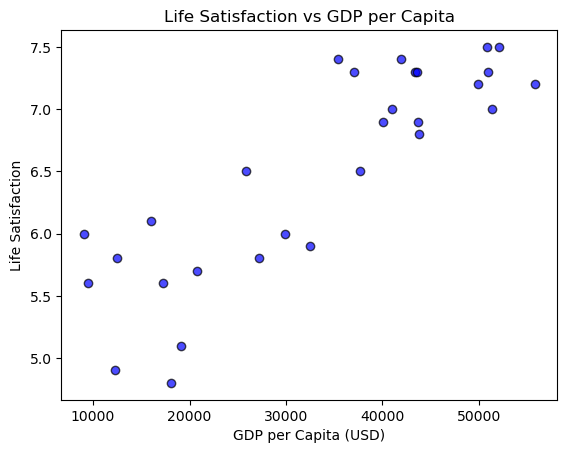

In [9]:
plt.scatter(X, y, color='blue', edgecolor='black', alpha=0.7)
plt.title("Life Satisfaction vs GDP per Capita")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Life Satisfaction")
plt.show();


# Train the linear regression model

In [10]:
model = LinearRegression()
model.fit(X, y)
print('Model Trained Successfully!')

LinearRegression()

Model Trained Successfully!


# Make a prediction for Cyprus

In [11]:
cyprus_gdp_per_capita = [[22587]]
predicted_life_satisfaction = model.predict(cyprus_gdp_per_capita)

print(f"Predicted Life Satisfaction for Cyprus: {predicted_life_satisfaction[0][0]:.2f}")


Predicted Life Satisfaction for Cyprus: 5.96


# Export Model

In [13]:
joblib.dump(model, "linear_model.pkl")
print("Linear Regression model exported as 'linear_model.pkl'")

['linear_model.pkl']

Linear Regression model exported as 'linear_model.pkl'
